#**Introduction**
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We’ll look for insights in the data to devise strategies to drive growth and retention.




#**Define the Problem**


*   The PlayStore app data has enormous potential to drive app-making businesses to success.
*   Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for catergory, rating, size, and more.
*   Another dataset contains customer reviews of the android apps. Explore and analyze the data to discover key factors responsible for app engagement and success.



#**Load the Dataset**

In [ ]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline


In [ ]:
#after mounting with gdrive loading the dataset from their paths
apps_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv')
reviews_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Reviews.csv')
#Checking what columns are there in the dataset
apps_df.columns
#Checking Number of columns and rows
apps_df.shape

(10841, 13)

Let’s take a look at the data, which consists of two files:
*  apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
*  user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity

Now lets peak into our datasets.

In [ ]:
#first we will look into apps data
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#now we will look into user_review dataset
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#**Data description**


1.   App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- Whether the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropriate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App




In [ ]:
apps_df.info()
apps_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
reviews_df.info()
reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#**Drop Duplicate values from Datasets**

In [ ]:
# Drop duplicates from apps_with_duplicates
apps = apps_df.drop_duplicates()
apps_df['Installs'] = apps_df['Installs'].replace(['Free'],'0')

apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Gaming Category App
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,False
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,False
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,False
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,False


In [ ]:
#Row 10472 removed due to missing value of Category
apps_df.drop(apps_df.index[10472], inplace=True)

In [ ]:
# Print the total number of apps
print('Total number of apps in the dataset = ',apps_df.count())

Total number of apps in the dataset =  App               10840
Category          10840
Rating             9366
Reviews           10840
Size              10840
Installs          10840
Type              10839
Price             10840
Content Rating    10840
Genres            10840
Last Updated      10840
Current Ver       10832
Android Ver       10838
dtype: int64


#**Data cleaning**
Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it’s worth should never be undermined.

By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs and Price have a few special characters (+ , $) due to the way the numbers have been represented.

This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0–9].
Hence, we now proceed to clean our data. Specifically, the special characters , and + present in Installs column and $ present in Price column need to be removed.

In [ ]:
apps_df['Installs'] = apps_df['Installs'].map(lambda x: x.rstrip('+'))
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'].str.replace(',',''))


In [ ]:
apps_df['Price'] = pd.to_numeric(apps_df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
apps_df['Installs'].min(),apps_df['Installs'].max()
#As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs
apps_df['log_installs'] = np.log10(apps_df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


#**Exploratory data analysis**
With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.




##**observation 1**
**Exploring app categories**
With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it’s important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.
Which category has the highest share of (active) apps in the market? Is any specific category dominating the market? Which categories have the fewest number of apps? ***We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.***

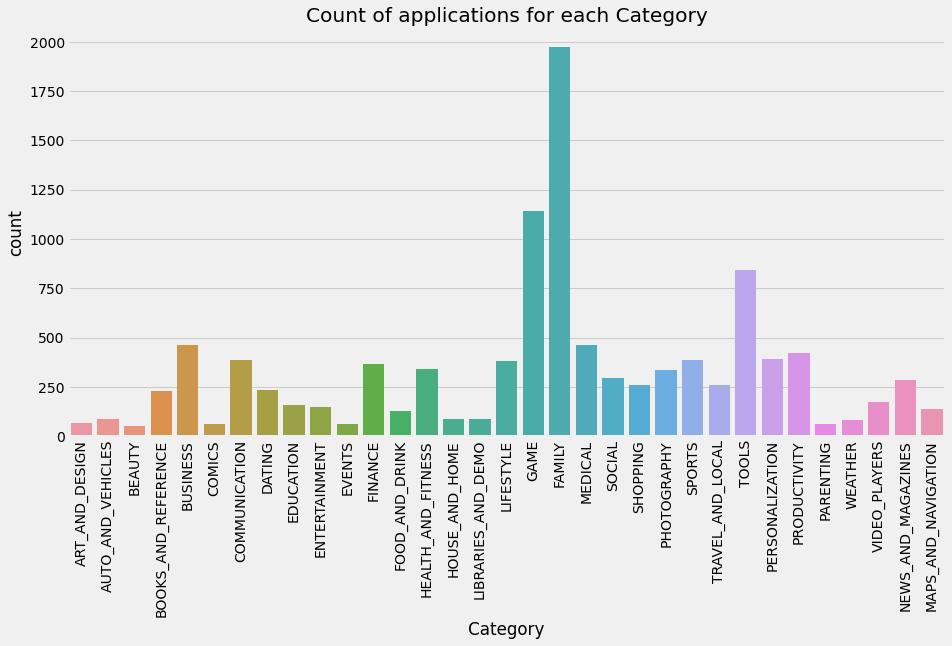

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.countplot(x=apps_df["Category"])


#**Observation 2**
##**Installs acording to generes**
* 	As we can see communication genre has the highest number of installs in this genre social media apps like whats app and Gmail are included which has a huge number of customer base as everyone in this day and age uses social media apps.
* Then it is followed by social media apps and then productivity and follows.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


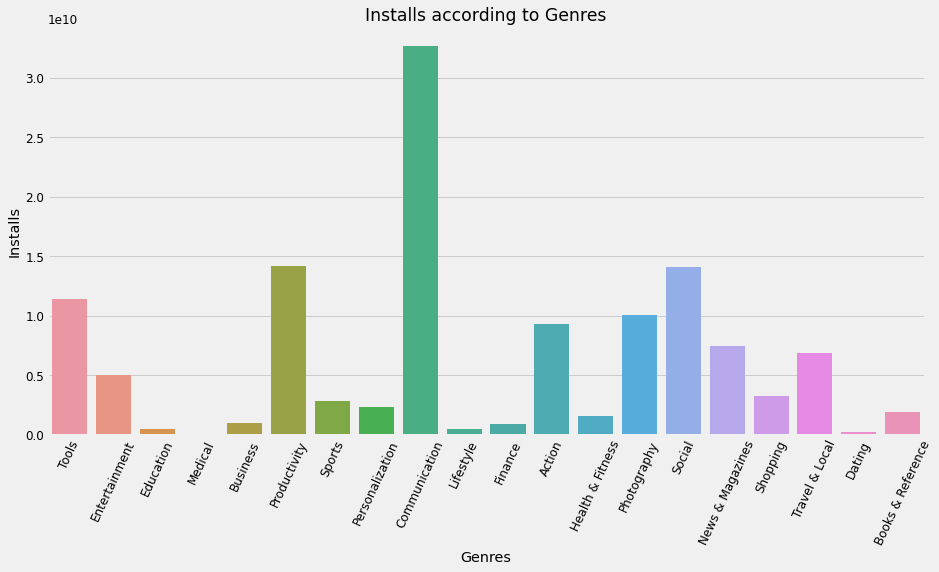

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

#**Observation 3**
##**Heatmap**
With more installs, more reviews will come to our dataset. So they are more codependent



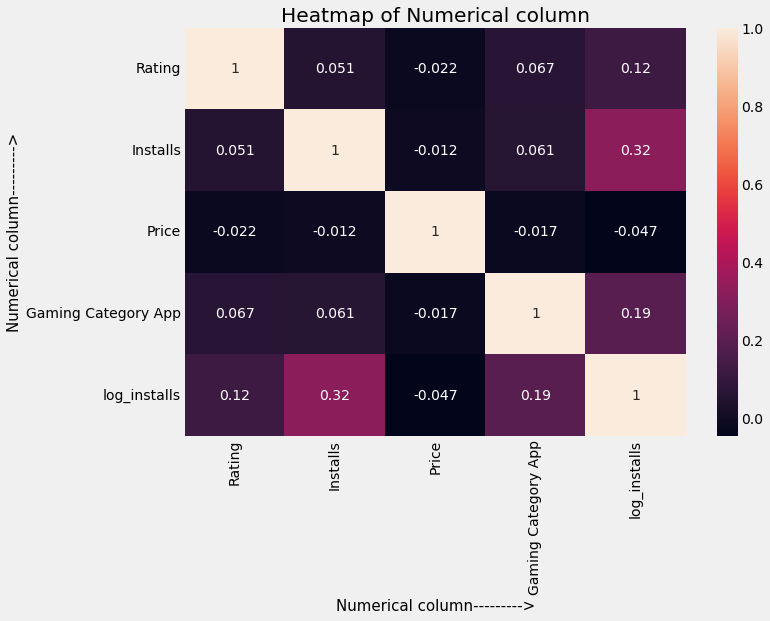

In [ ]:
# heatmap syntax(always ploted on correlation)
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Heatmap of Numerical column")
sns.heatmap(apps_df.corr(),annot=True,robust=True)
plt.xlabel("Numerical column--------->", fontsize=15)
plt.ylabel("Numerical column--------->", fontsize=15)
plt.show();

#**observation 4**
* After having witnessed the market share for each category of apps, let’s see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company’s overall brand image. Ratings are a key performance indicator of an app.

* 	From our research, we found that the average volume of ratings across all app categories is 4.17. The violin plot plot is broad between 4 and 5 indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

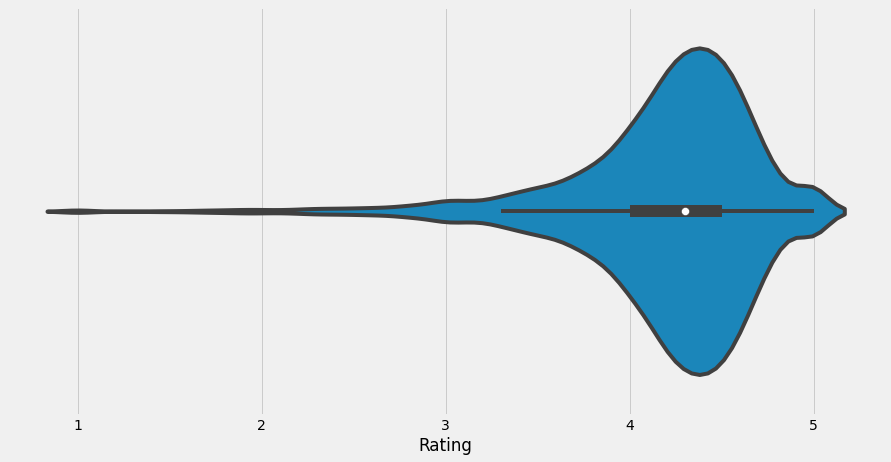

In [ ]:
plt.figure(figsize=(14,7))
sns.violinplot(x=apps_df["Rating"])
plt.show()


#**Observation 5**
**Count of applications in each category differentiated by their type**


*   It looks like certain app categories have more free apps available for download than others.The majority of apps in the Family, Food & Drink, and Tools, as well as Social categories were free to install.
*   At the same time Family, Sports, Tools, and Medical categories had the biggest number of paid apps available for download.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


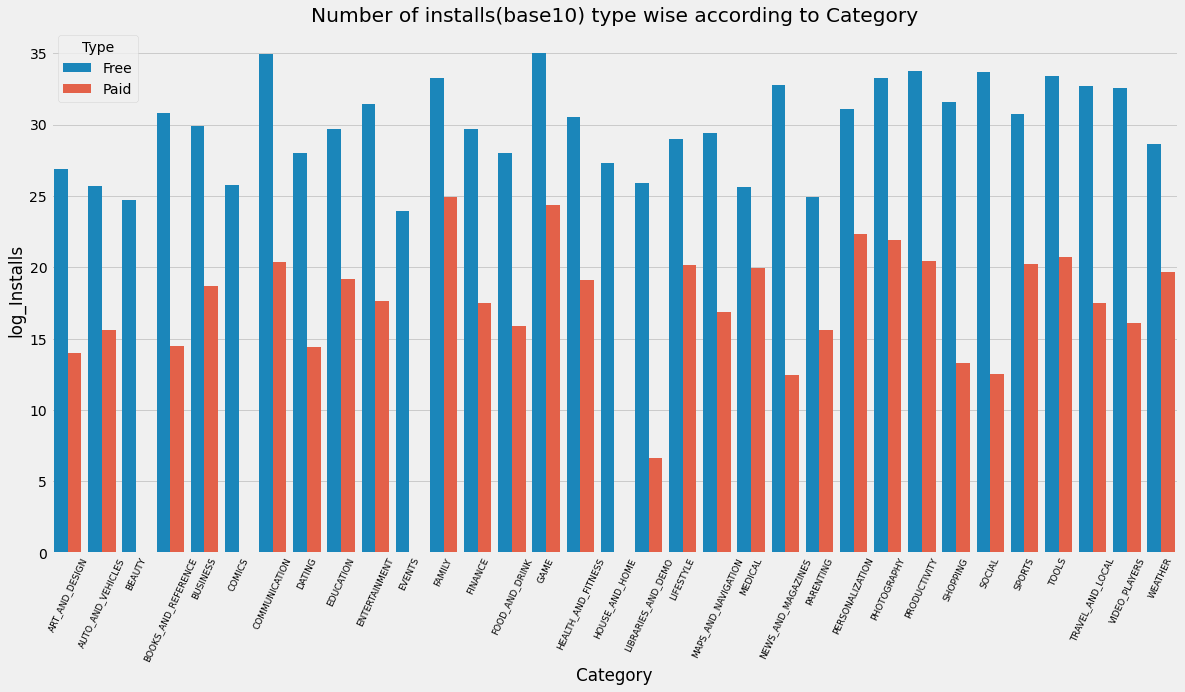

In [ ]:
apps_df['Gaming Category App'] = apps_df['Category']=='GAME'
categoty_type_installs = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

#**Observation 6**
###**Distribution of subjectivity**
It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

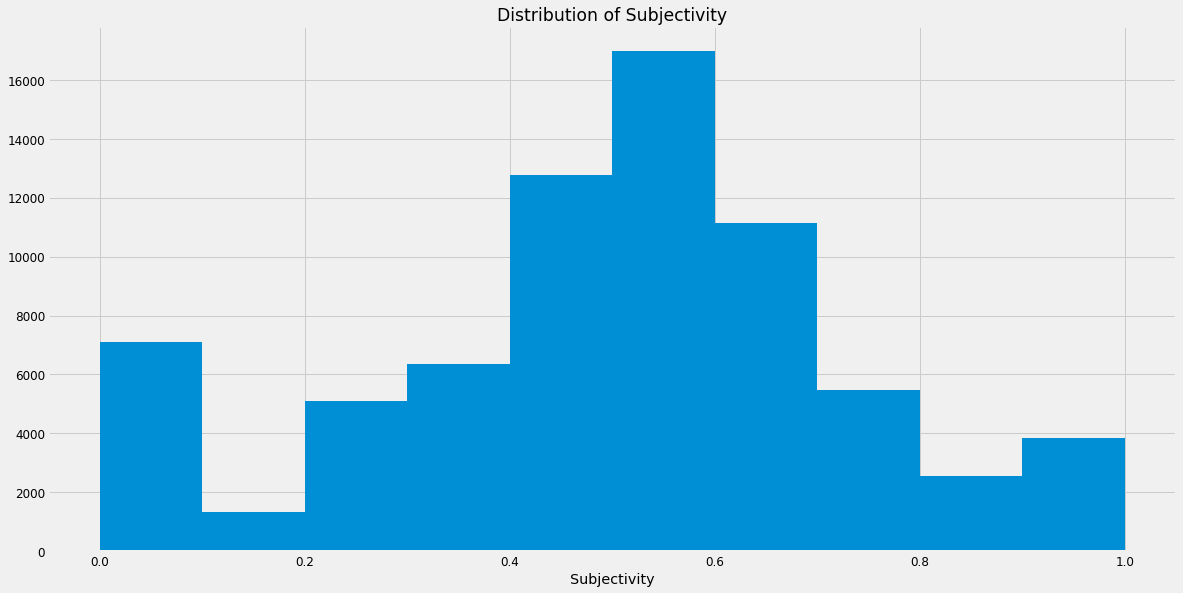

In [ ]:
#Deciding figure size
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
#title of the graph
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

#**Observation 7**
###**What is the distribution of type of reviews in the dataset?**


*   First we will merge our 2 DataFrames into a single DataFrame:-
In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].



In [ ]:
#Merging the two Dataframes
merged_df = apps_df.merge(reviews_df, on="App")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


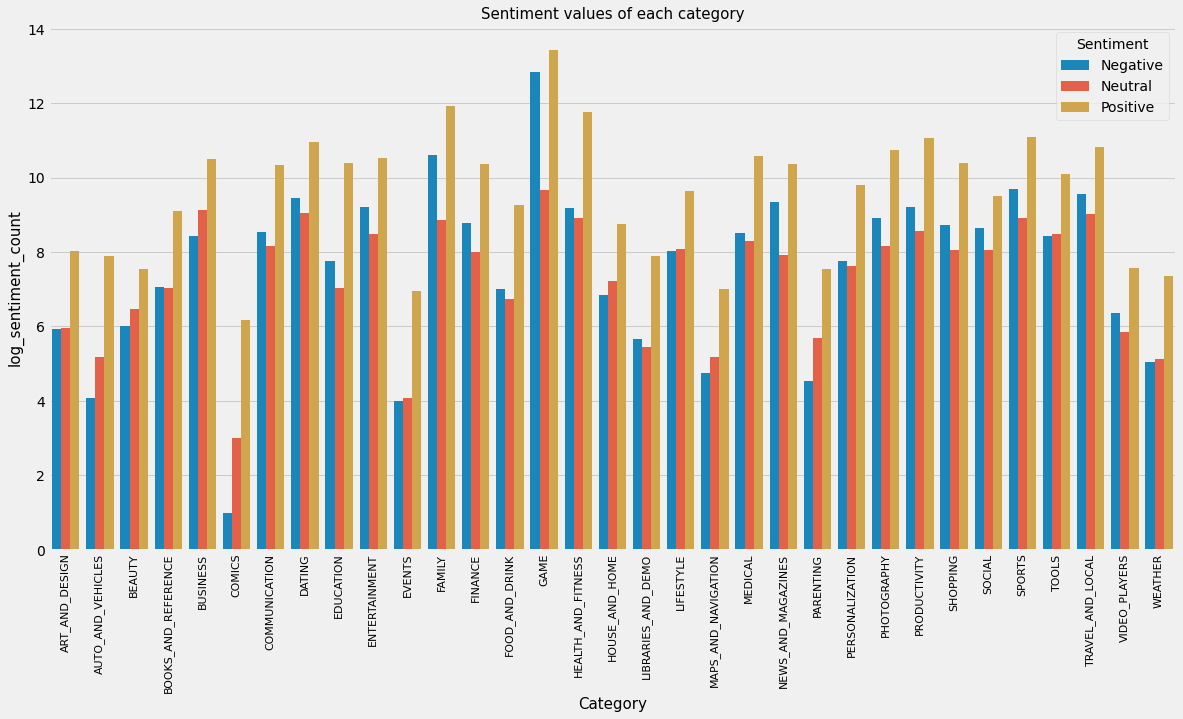

In [ ]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
#taking log 2 method due to highly large values present in the column.
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Sentiment values of each category",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

#**Observation 8**
##**Does sentiment_subjectivity proportional to sentiment_polarity?**
From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


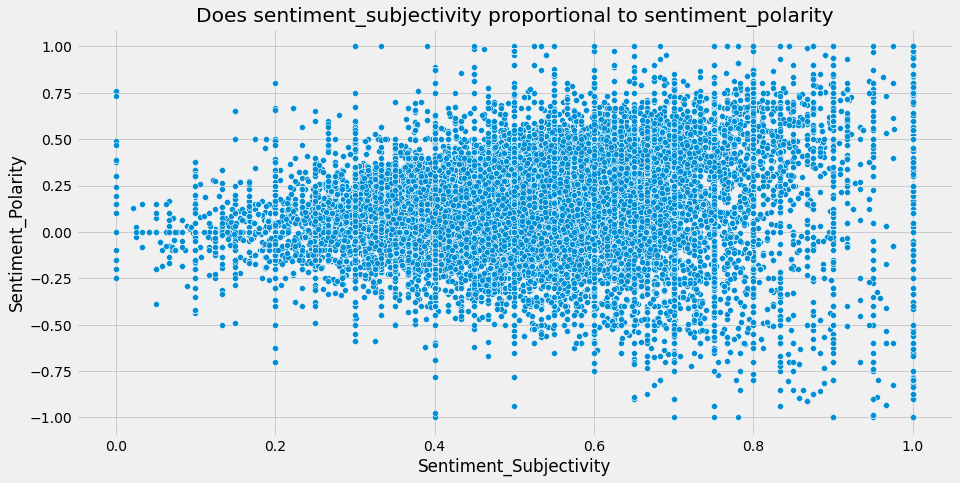

In [ ]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

#**Observation 9**
##**Percentage of Review Sentimets**
As is clear from the pie charts there are 64.1 % of Positive sentiments, 22.1% of Negative sentiments, and 13.8% neutral sentiments


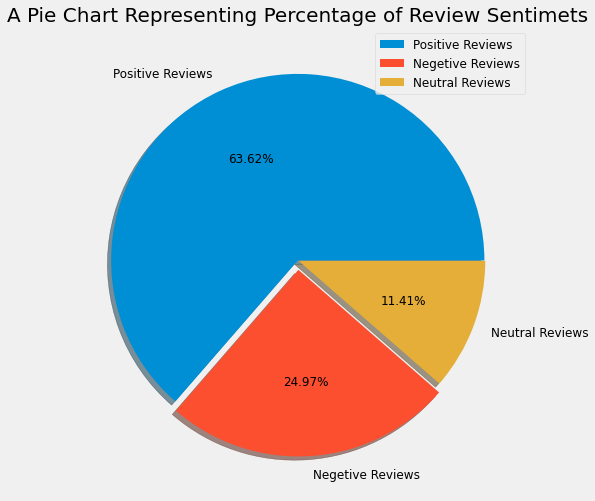

In [ ]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

#**Conclusion**


*   Family category apps have the highest number of application.
*   Communication gener has the most number of installs due to their huge user base
* Most of the apps are rated between 4 to five stars which shows that most of the apps are userfriendly.
* Free apps have high number of installs over paid apps.
* Maximum number of users give reviews to the applications, according to their experience.
* Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.
* Most of the sentiments are positive with greatest number of percentage.

